# **Dados do Experimento**






(y1 = 1012; y2 = 1058; y3 = 1238; y4 = 403)

(t1 = 2.366, t2 = 2.399, t3 = 2.699, t4 = 3.297)



---
### Importando as bibliotecas e armazenando as contantes 

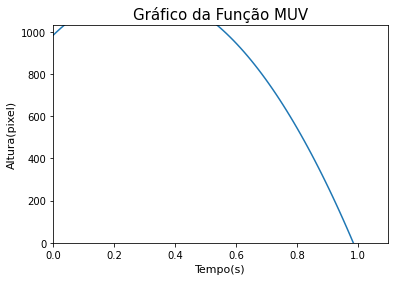

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Alturas 
h0 = 985
h2= 1031
h3 = 326

# Velocidade Inicial
v0 = 1393.94

# Aceleração
acel = -4856.93

# Recebe o tempo e retorna altura
def funcao(t):
  h = h0 + v0*t + (acel*(t**2))/2
  return h

# Recebe: Tempo
# Retorna: Velocidade instant

def e_funcao(t):
  v = v0 + acel*t
  return v

# função para encontrar o x_max por método de Newton
def e_newton(x0,e,N):
  x = x0
  it = 0
  erro = 1

  while (it < N) and (erro > e) :

    x_antigo = x
    x = x_antigo - e_funcao(x_antigo)/acel
    erro = abs((x-x_antigo)/x) 

    it += 1 

  return x,erro,it 


# Criando vetores para os eixos x e y
tempo_x = np.linspace(0,1.150,100)
altura_y = np.zeros(np.size(tempo_x))

cont = 0
for i in tempo_x:
  v1 = funcao(i)
  altura_y[cont] = v1
  cont += 1

# Encontrando o y_max
x, e, i = e_newton(0.3,10**(-3),2) 
y = funcao(x)
vy = np.linspace(y,y,np.size(tempo_x))

# Plotando o gráfico do espaço em função do tempo
plt.plot(tempo_x,altura_y)
plt.plot(tempo_x,vy)
plt.title("Gráfico da Função MUV",fontsize=15)
plt.xlabel("Tempo(s)",fontsize=11)
plt.ylabel("Altura(pixel)",fontsize=11)
plt.xlim(0,1.1)
plt.ylim(0,h2)
plt.plot(acel,0)



---



# Método da Bisseção

In [ ]:
# Recebe: Intervalo de valores, Erro máximo, Número max de iterações
# Retorna: Raiz, Erro relativo, Iterações

def bissecao(a,b,e,N):
  x = a
  it = 0
  erro = 1

  while (it < N) and (erro > e) :

    x_antigo = x
    x = (a+b)/2
    erro = abs((x-x_antigo)/x) 

    if funcao(a)*funcao(x) < 0:
      b = x
    else:
      a = x
    it += 1 

  return x,erro,it

def e_bissecao(a,b,e,N):
  x = a
  it = 0
  erro = 1

  while (it < N) and (erro > e) :

    x_antigo = x
    x = (a+b)/2
    erro = abs((x-x_antigo)/x) 

    if e_funcao(a)*e_funcao(x) < 0:
      b = x
    else:
      a = x
    it += 1 

  return x,erro,it
 
# Valores Obtidos 
# a = 0.967; b = 0.967; Erro máximo = 10^(-3); Max iteração = 9

x, erro, it = bissecao(0.967,0.966,10**(-3),9) 

print("Raiz:",x)
print("Erro Relativo:", erro)
print("Número de iterações:", it)

# Encontrando o x_max e y_max
x_max, e, i = e_bissecao(0.3,0.4,10**(-3),9) 
y_max = funcao(x_max)

print()
print("Ponto máximo: ")
print("t:",x_max,"h:",y_max)
print("Erro Relativo:", e)
print("Número de iterações:", i)


Raiz: 0.9664999999999999
Erro Relativo: 0.0005173305742369954
Número de iterações: 1

Ponto máximo: 
t: 0.39960937500000004 h: 1154.2356169456482
Erro Relativo: 0.0009775171065494479
Número de iterações: 8


# Método da Falsa-Posição

Tempo:  0.9855523972678658
Numero de interacoes:  3
Erro:  0.000270833402837797


(0.0, 1031.0)

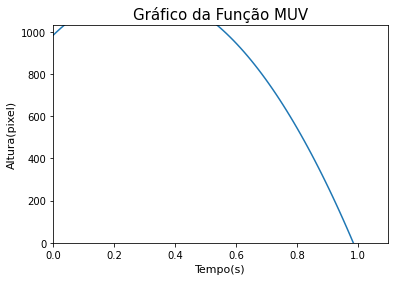

In [ ]:
# Definindo a função de Falsa-Posição
def falsa_posi(x0,x1,e,N):
  
  x_a0 = x0
  x = x1
  it = 0
  erro = 1

  while (it < N) and (erro > e) :

    x_a1 = x_a0
    x_a0 = x
    x = x_a0 - funcao(x_a0)*(x_a1 - x_a0)/(funcao(x_a1)-funcao(x_a0))
    erro = abs((x-x_a1)/x) 

    it += 1 

  return x,erro,it

# Valores Obtidos 
x, erro, it = falsa_posi(0.967,0.966,10**(-3),4)
print("Tempo: ",x)
print("Numero de interacoes: ", it)
print("Erro: ", erro)

# Criando vetores para os eixos x e y
tempo_x = np.linspace(0,1.150,100)
altura_y = np.zeros(np.size(tempo_x))

cont = 0
for i in tempo_x:
  v1 = funcao(i)
  altura_y[cont] = v1
  cont += 1

# Plotando o gráfico do espaço em função do tempo
plt.plot(tempo_x,altura_y)
plt.title("Gráfico da Função MUV",fontsize=15)
plt.xlabel("Tempo(s)",fontsize=11)
plt.ylabel("Altura(pixel)",fontsize=11)
plt.xlim(0,1.1)
plt.ylim(0,h2)


# Método de Newton

In [ ]:
# Recebe: Valor de x0, Erro máximo, Número max de iterações
# Retorna: Raiz, Erro relativo, Iterações

def newton(x0,e,N):
  x = x0
  it = 0
  erro = 1

  while (it < N) and (erro > e) :

    x_antigo = x
    x = x_antigo - funcao(x_antigo)/e_funcao(x_antigo)
    erro = abs((x-x_antigo)/x) 

    it += 1 

  return x,erro,it 

In [ ]:
# função para encontrar o x_max por método de Newton
def e_newton(x0,e,N):
  x = x0
  it = 0
  erro = 1

  while (itera < N) and (erro > e) :

    x_antigo = x
    x = x_antigo - e_funcao(x_antigo)/acel
    erro = abs((x-x_antigo)/x) 

    it += 1 

  return x,erro,it 


### Resultado | Método de Newton

In [ ]:
# Valores Obtidos 

# Encontrando a raiz
# x0 = 1; Erro máximo = 10^(-3); Max iteração = 3

x, erro, itera = newton(1,10**(-3),3)

print("Tempo: ",x)
print("Numero de interacoes: ", itera)
print("Erro: ", erro)

# Encontrando o x_max e y_max

x_max, e, i = e_newton(0.3,10**(-3),2) 
y_max = funcao(x_max)

print()
print("Ponto máximo: ")
print("t:",x_max,"h:",y_max)
print("Erro Relativo:", e)
print("Número de iterações:", i)

Tempo:  0.9855524133243052
Numero de interacoes:  2
Erro:  0.00014850700170293123

Ponto máximo: 
t: 0.3 h: 1184.62015
Erro Relativo: 1
Número de iterações: 0




------


# Método da Secante

In [ ]:
# Recebe: Valor de x0, valor de x1, Erro máximo, Número max de iterações
# Retorna: Raiz, Erro relativo, Iterações

def secante(x0,x1,e,N):
  
  x_a1 = x0
  x = x1
  itera = 0
  erro = 1

  while (itera < N) and (erro > e) :

    x_a2 = x_a1
    x_a1 = x
    x = x_a1 - funcao(x_a1)*(x_a2 - x_a1)/(funcao(x_a2)-funcao(x_a1))
    erro = abs((x-x_a1)/x) 

    itera += 1 

  return x,erro,itera 


In [ ]:
def e_secante(x0,x1,e,N):
  
  x_a0 = x0
  x = x1
  it = 0
  erro = 1

  while (it < N) and (erro > e) :

    x_a1 = x_a0
    x_a0 = x
    x = x_a0 - e_funcao(x_a0)*(x_a1 - x_a0)/(e_funcao(x_a1)-e_funcao(x_a0))
    erro = abs((x-x_a0)/x) 

    it += 1 

  return x,erro,it

### Resultado | Método da Secante

In [ ]:
# Valores Obtidos 
# x0 = 1; x1 = 2; Erro máximo = 10^(-3); Max iteração = 4

x, erro, it = secante(0.967,0.966,10**(-3),4)

print("Raiz:",x)
print("Erro:", erro)
print("Número de iterações:", itera)

# Encontrando o x_max e y_max

x_max, e, i = e_secante(0.4,0.5,10**(-3),2) 
y_max = funcao(x_max)

print()
print("Ponto máximo: ")
print("t:",x_max,"h:",y_max)
print("Erro Relativo:", e)
print("Número de iterações:", i)

Raiz: 0.9855486101771932
Erro: 0.00027467706544778844
Número de iterações: 2

Ponto máximo: 
t: 0.2870002244215996 h: 1185.0305464151224
Erro Relativo: 1.9341849416017411e-16
Número de iterações: 2


# Resultado Geral

**Momento que a bola chega ao chão**

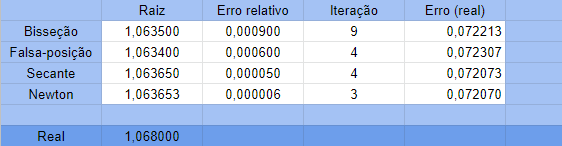

**Momento que a bola chega no ápice**

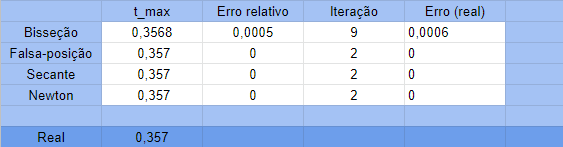